https://bit.ly/FEML-3-GD

## Градиентный спуск

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

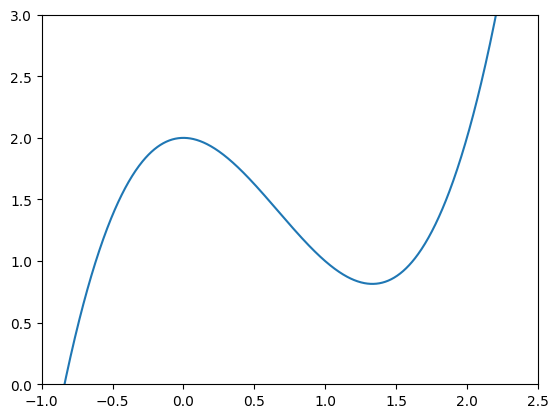

In [2]:
f = lambda x: x**3 - 2 * x**2 + 2
x = np.linspace(-1, 2.5, 1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

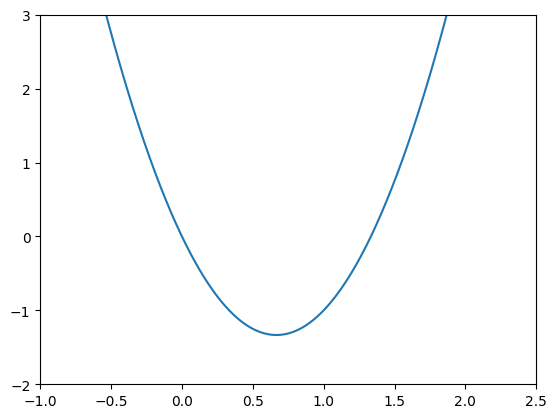

In [3]:
f_prime = lambda x: 3 * x**2 - 4 * x
x = np.linspace(-1, 2.5, 1000)
plt.plot(x, f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Метод градиентного спуска

In [4]:
lr = 0.1
points = [2]
n_epochs = 15

In [5]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [6]:
y_points = [f(p) for p in points]

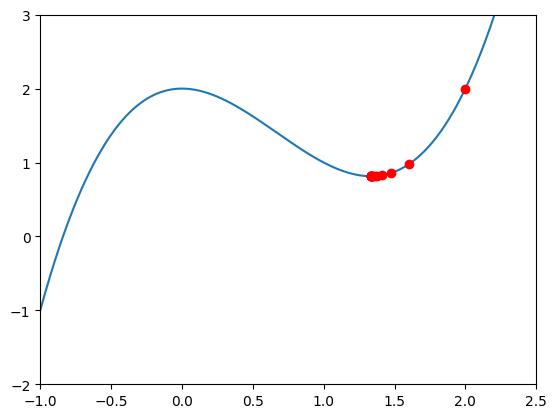

In [7]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практический пример

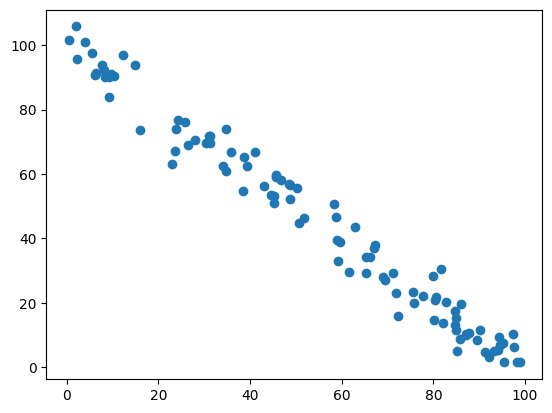

In [8]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = -X + 100 + np.random.normal(scale=5, size=N)
# X = 2 * np.random.rand(100, 1)
# Y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, Y)
plt.show()

## Применим метод градиентного спуска

In [9]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [10]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += (pred - y[i]) ** 2
    return total_cost / len(X)

$$Loss = (θ_0 + θ_1 * x - y)^2 $$

$$\frac{dLoss}{dθ_0} = 2 \cdot (θ_0 + θ_1 * x - y) \cdot 1 $$


$$\frac{dLoss}{dθ_1} = 2 \cdot (θ_0 + θ_1 * x - y) \cdot x $$

In [11]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i])
    return total_cost / len(X)    

In [12]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i]) * X[i]
    return total_cost / (len(X))  

In [13]:
theta0 = 1
theta1 = 1

for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 0.9980977646234122 t1: 0.5363977040880039 cost: 2405.0639743390384
t0: 1.0012248470953642 t1: 0.42889140403532083 cost: 2333.738475988147
t0: 1.0055174814066192 t1: 0.4039226993961901 cost: 2329.7024273509223
t0: 1.0100801058337672 t1: 0.3980849464690916 cost: 2329.2814651939784
t0: 1.0147051429056728 t1: 0.3966814572379985 cost: 2329.0547395269086
t0: 1.0193444793544024 t1: 0.39630576471401663 cost: 2328.8384681464736
t0: 1.0239869632698129 t1: 0.39616830206855064 cost: 2328.622777511275
t0: 1.0286300098178958 t1: 0.3960860598143107 cost: 2328.407137172071
t0: 1.0332730198815614 t1: 0.3960166191574824 cost: 2328.1915186291453
t0: 1.0379158546024612 t1: 0.39595014807180934 cost: 2327.975920349591
t0: 1.042558481803167 t1: 0.39588436764421553 cost: 2327.760342249267
t0: 1.0472008940332522 t1: 0.39581874965747416 cost: 2327.5447843218662
t0: 1.05184308957363 t1: 0.39575317167881924 cost: 2327.3292465652626
t0: 1.056485068033649 t1: 0.3956876053301021 cost: 2327.1137289775575
t0: 1.06

In [14]:
cost_function(X,Y,10,10)

np.float64(365556.94930403377)

$$Loss = \frac{1}{n}||Xw - Y||^{2}$$


где используется $L_{2}$ норма:

$$||X w - Y|| = \sqrt{\sum_{i=1}^n{(X_iw - y_i)^2}} $$

$$MSE = \frac{1}{n}\sqrt{\sum_{i=1}^n{(X_iw - y_i)^2}} ^{2} = \frac{1}{n}\sum_{i=1}^n{(X_iw - y_i)^2}$$

Градиент:

$$\frac{∂ MSE}{∂ w_0} = \frac{2}{n}\sum{({Xw - y})}$$

$$\frac{∂ MSE}{∂ w} = \frac{2}{n}\sum{({Xw - y}) \cdot X}$$


In [15]:
EPOCHS = 20
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)

list_params_gd = [params.copy()]
for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) * (2/len(predictions))
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) * (2/len(predictions))    

    list_params_gd.append(params.copy())

[ 0.00110855 -0.28954407]


In [16]:
costs[-1]

np.float64(2371.7306219263855)

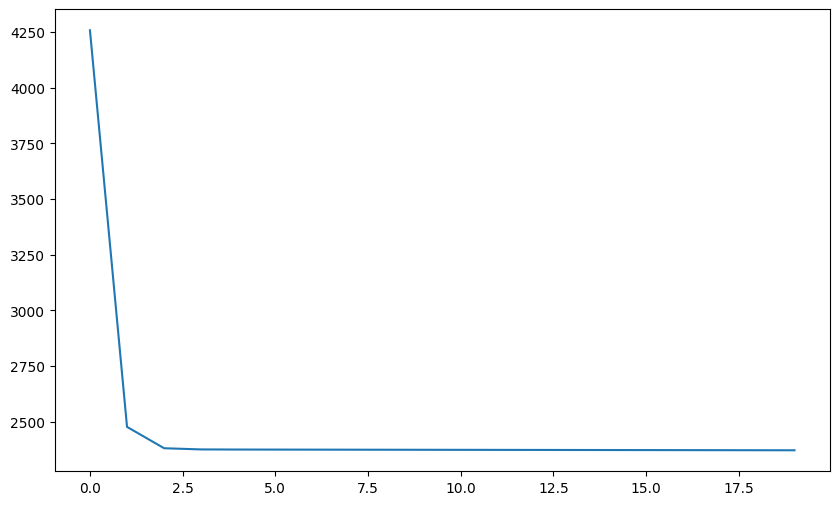

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.show()

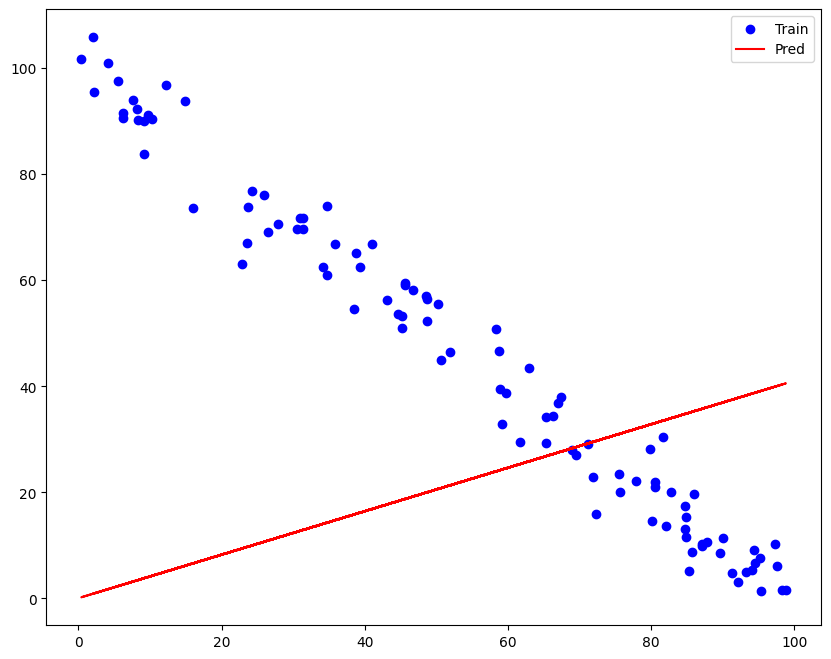

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(X, Y, color='blue', label='Train')
plt.plot(X, preds[10], color='red', label='Pred')
plt.legend()
plt.show()

In [19]:
params

array([0.10476728, 0.40912976])

## Метод стохастического градиентного спуска

In [128]:
EPOCHS = 1000
LEARNING_RATE = 0.01

costs = []
params = []
preds = []
np.random.seed(9)
params = [1, 0.5]
print(params)
list_params_sgd = [params.copy()]

for _ in range(EPOCHS):
    predictions = (params[1] * X) + params[0]
    preds.append(predictions)
    
    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)
    
    i = np.random.choice(len(X))
    current_prediction = (X[i] * params[1]) + params[0]

    params[0] += -2 * LEARNING_RATE * (current_prediction - Y[i]) * 1 # bias?
    params[1] -= LEARNING_RATE * (current_prediction - Y[i]) * X[i] * (2 / len(predictions))

    list_params_sgd.append(params.copy())

[1, 0.5]


In [129]:
costs[-1]

np.float64(25.532277766576662)

In [130]:
params

[np.float64(98.45383095799977), np.float64(-0.7772292620733767)]

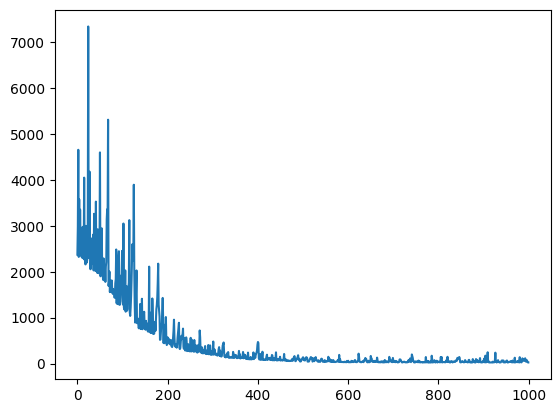

In [131]:
plt.plot(costs)
plt.show()

1000

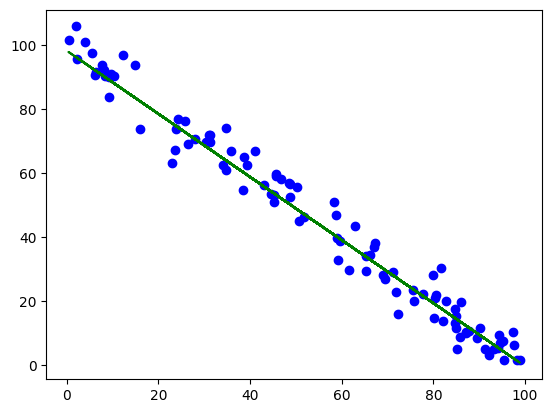

In [132]:
plt.scatter(X, Y, color='blue')
# for x in range(len(preds)-1, 0, -1):
    # plt.plot(X, preds[x], 'r-')
plt.plot(X, preds[-1], 'g-')
len(preds)


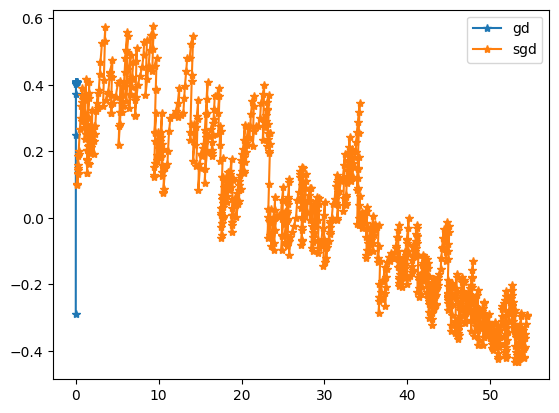

In [76]:
list_params_sgd = np.array(list_params_sgd)
list_params_gd = np.array(list_params_gd)

plt.plot(list_params_gd[:, 0], list_params_gd[:, 1], marker='*', label='gd')
plt.plot(list_params_sgd[:, 0], list_params_sgd[:, 1], marker='*', label='sgd')
plt.legend()
plt.show()

## **Дополнительные материалы**
1. Методы оптимизации нейронных сетей https://habr.com/ru/post/318970/
2. Реализация линейной регрессии https://www.youtube.com/watch?v=KJA9A1q9l7E
3. Реализация логистической регрессии https://youtu.be/ruVK07YF-RU
4. Метод сопряжённых градиентов (Newton conjugate gradient method) http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D1%8B%D1%85_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2
